# Experiment 2: Support Vector Machine

1st April 2024

## Description

In this experiment, you will implement linear/non-linear Support Vector Machine (SVM) models on given data set, and deepen the knowledge and understanding of the hyperparameters and kernel functions involved through visualization.

Write your code between the lines `########## Start/End of Your Code ##########`.

You should add some comments to keep readability of your code. If your code is not understandable, you will not receive full marks even if your results are correct.

You can add some markdown/code cells to explain your code if necessary. 


In [1]:
# Import necessary libraries
# If you have not installed the libraries, you can install them by running `!pip install <name>` in a code cell
# You can add more libraries here if necessary, but avoid using highly integrated, function-calling libraries, e.g., sklearn, PyTorch, Tensorflow, etc.

from sklearn import svm
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
from matplotlib.colors import ListedColormap
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV

# Suppress warnings
warnings.filterwarnings("ignore", category=DataConversionWarning)

## Task 1: Linear SVM

Recall that in SVM, we separate the data points by finding the hyperplane that maximizes the margin between the two classes. The hyperplane is defined by the equation $\boldsymbol{w}^T \boldsymbol{x} + b = 0$, where $\boldsymbol{w}$ is the normal vector to the hyperplane, and $b$ is the bias term. 

The primal form of SVM with soft margin is given by the following optimization problem:

$$
\min_{\boldsymbol{w}, b, \boldsymbol{\xi}} \frac{1}{2} \|\boldsymbol{w}\|^2 + C \sum_{i=1}^n \xi_i \\
\text{s.t. } y_i(\boldsymbol{w}^T \boldsymbol{x}_i + b) \geq 1 - \xi_i, \\ 
\quad\quad \xi_i \geq 0, i = 1, 2, \ldots, n,
$$

where $\boldsymbol{x}_i$ is the $i$-th sample, $y_i\in \{+1, -1\}$ is the label of the $i$-th sample, and $C$ is the regularization parameter. $\boldsymbol{\xi}$ is the slack variable, which allows some samples to be misclassified.

In this task, we will implement a simple SVM model to classify the given data set. The data set is a 2D data set, and the labels are binary.


### Data Loading

The dataset is ready for you and is stored in the file `T1_data.csv`. Each row in `T1_data.csv` is a sample, with 2 features and the corresponding label (-1/1).


In [2]:
# Load the data
# Requirements:
# - You can load the data in 'T1_data.csv' a DataFrame/ndarray
# - Store the features in a variable named 'X' and the labels in a variable named 'y'

########## Start of Your Code ##########
data = pd.read_csv('T1_data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Turn Dataframe into np array
X = np.array(X)
y = np.array(y)

########## End of Your Code ##########

print(X.shape, y.shape)  # (51, 2) (51,)

(51, 2) (51,)


Text(0.5, 1.0, 'Data Distribution')

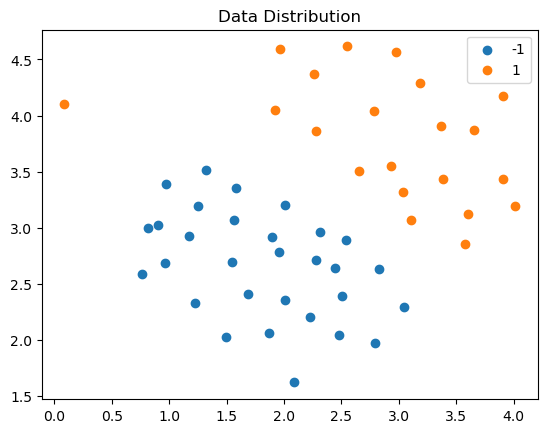

In [3]:
# Draw a simple plot to get an intuitive insight into the data distribution
# Requirements:
# - You can use the matplotlib library to draw a scatter plot
# - An example of the plot is given below, of course, you can change the style as you like

########## Start of Your Code ##########
plt.scatter(X[y==-1, 0], X[y==-1, 1], label='-1')
plt.scatter(X[y==1, 0], X[y==1, 1], label='1')
plt.legend()
plt.title('Data Distribution')
########## End of Your Code ##########


An example plot is shown here. You can make it more beautiful if you like.

![data_distribution](data_distribution.png)

### Model Implementation

Now we will implement the linear SVM model. You can use the `sklearn` library to implement the model. You should refer to the documentation of the library and make sure you fully understand the usage of the model.


In [4]:
# Implement the SVM model
# Requirements:
# - Your classifier should be stored in a variable named 'clf'
# - You can use the svm.SVC class in the sklearn library to implement the SVM model
# - You should use the LINEAR kernel

########## Start of Your Code ##########
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
########## End of Your Code ##########


SVC(kernel='linear')

### Model Visualization

We have provided a function to visualize the decision boundary of the model. Just run the block below to visualize the decision boundary.

In [5]:
# Draw the decision boundary
def plot_decision_boundary(clf, X, y, ax):
    """
    Plot the decision boundary of the classifier
    :param clf: the trained classifier
    :param X: 2-d array
    :param y: 1-d array
    :param ax: the axis to draw the plot
    :return: 
    """
    DecisionBoundaryDisplay.from_estimator(
        clf, X, ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        clf, X, ax=ax,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )
    ax.scatter(X[y==-1, 0], X[y==-1, 1], edgecolors='k', label='-1')
    ax.scatter(X[y==1, 0], X[y==1, 1], edgecolors='k', label='1')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()


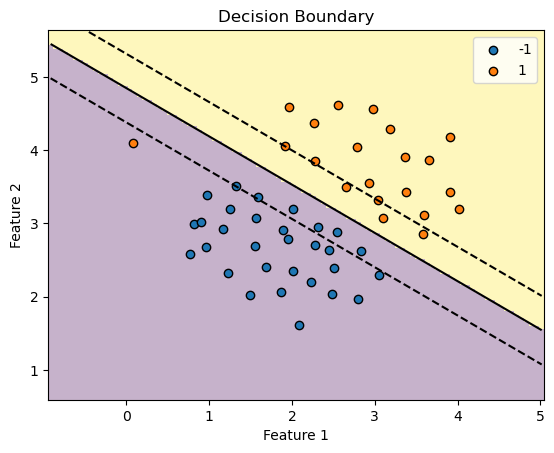

In [6]:
# Draw the decision boundary
# An example plot is given below

_, ax = plt.subplots(1, 1)
plot_decision_boundary(clf, X, y, ax)
plt.title('Decision Boundary')
plt.show()


An example plot is shown here. Your plot should be similar to this one.

![decision_boundary](decision_boundary.png)

### Visualizing Hyperparameter Space

In this part, you are asked to visualize the effect of hyperparameter $C$ (regularization parameter) of the SVM model.


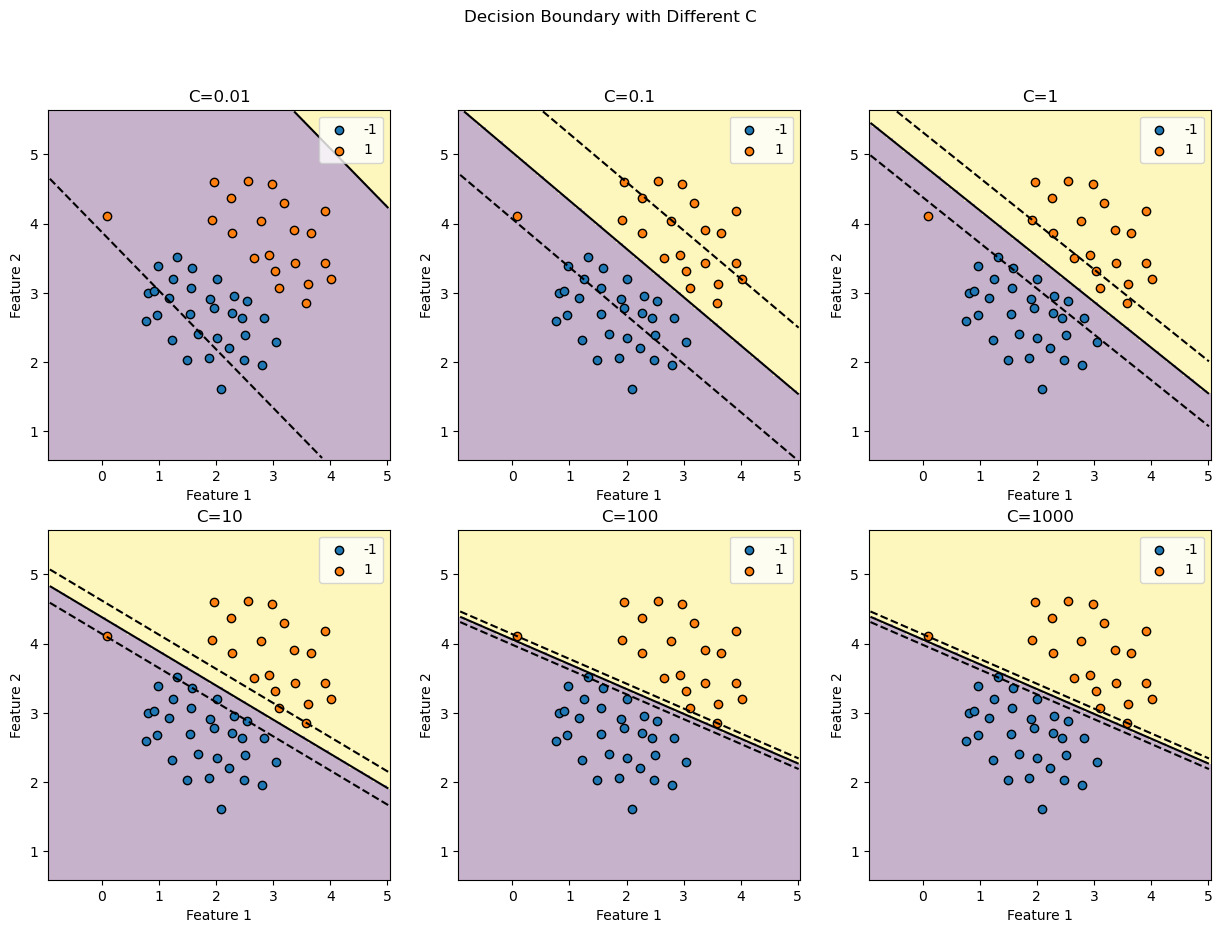

In [7]:
# Visualizing Hyperparameter Space over C
# Requirements:
# - You should implement the SVM model with different C values
# - You should draw the decision boundary of each model using the provided function above
# - Candidate C values are provided

C_list = [0.01, 0.1, 1, 10, 100, 1000]
row_num, col_num = 2, 3
fig, axes = plt.subplots(row_num, col_num, figsize=(15, 10))

for row in range(row_num):
    for col in range(col_num):
        i = row * col_num + col
        ax = axes[row, col]
        
        ########## Start of Your Code ##########
        clf_C = svm.SVC(kernel='linear', C=C_list[i])
        clf_C.fit(X, y)
        plot_decision_boundary(clf_C, X, y, ax)
        ########## End of Your Code ##########
        
        ax.set_title(f'C={C_list[i]}')

plt.suptitle('Decision Boundary with Different C')
plt.show()


## Task 2: Non-linear SVM

In the previous part, we used a linear SVM. In fact, we may face more difficult data sets. When the decision boundary between different classes is Non-linear or when the data is not linearly separable, Non-linear SVM is selected. I believe that all of the students have already studied the relevant formulas in class. Here we will review the dual problem about Non-Linear SVM.

The dual form of SVM is given by the following optimization problem:

$$
\min_{ \boldsymbol{\alpha}} \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha_{i}\alpha_{j}y_{i}y_{j}\phi(\boldsymbol{x}_{i})^{T}\phi(\boldsymbol{x}_{j}) -  \sum_{i=1}^{m}\alpha_{i}       \\
\text{s.t. } \sum_{i=1}^{m}\alpha_{i}y_{i} = 0, \\ 
\alpha_{i} \geq 0, i = 1,2,\ldots, m.
$$

where $\boldsymbol{x}_i$ is the $i$-th sample, $y_i\in \{+1, -1\}$ is the label of the $i$-th sample, $\phi$ is the kernel mapping, and $\alpha_{i}$ is the lagrange multiplier.
In this task, we will implement a Non-linear SVM model to classify the given data set. The data set is a 2D data set, and the labels are binary.


### Data Loading

The dataset is ready for you and is stored in the file `T2_data.csv`. Each row in `T2_data.csv` is a sample, with 2 features and the corresponding label (1/-1).

In [8]:
# Load the data
# Requirements:
# - You can load the data in 'T2_data.csv' into a DataFrame/ndarray
# - Store the features in a variable named 'X' and the labels in a variable named 'y'

########## Start of Your Code ##########
data = pd.read_csv('T2_data.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Turn Dataframe into np array
X = np.array(X)
y = np.array(y)
########## End of Your Code ##########

print(X.shape, y.shape)  # (200, 2) (200,)

(200, 2) (200,)


Text(0.5, 1.0, 'Data Distribution')

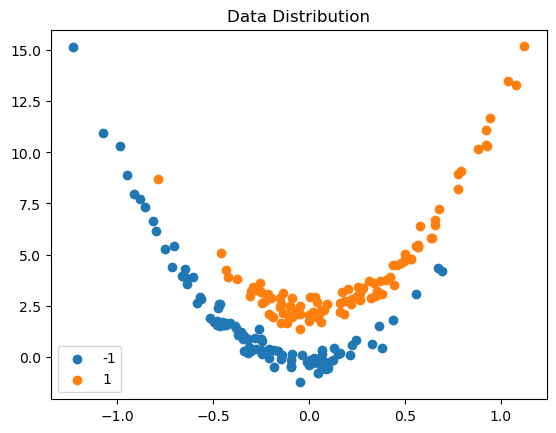

In [9]:
# Draw a simple plot to get an intuitive insight into the data distribution
# Requirements:
# - You can use the matplotlib library to draw a scatter plot
# - An example of the plot is given below, of course, you can change the style as you like

########## Start of Your Code ##########
plt.scatter(X[y==-1, 0], X[y==-1, 1], label='-1')
plt.scatter(X[y== 1, 0], X[y== 1, 1], label='1')
plt.legend()
plt.title('Data Distribution')
########## End of Your Code ##########


### Model Implementation

In this part, we mainly use the kernel function to directly implement nonlinear SVM library functions. You can use Gaussian, polynomial, sigmoid and other kernel functions for Non-linear SVM. Of course, you can also use linear kernels again for comparison.


In [10]:
# Implement the non-linear SVM model
# Requirements:
# - Your classifier should be stored in a variable named 'clf'
# - You should use the NON-LINEAR kernel
# - You can use different kernel functions in this part, and we strongly recommend trying as many as possible.

########## Start of Your Code ##########
clf = svm.SVC(kernel='rbf', gamma=10, C=1)
# clf = svm.SVC(kernel='poly', gamma=0.1, C=1)
# clf = svm.SVC(kernel='sigmoid', gamma=0.1, C=1)
########## End of Your Code ##########

# Fit the classifier to the data
clf.fit(X, y)

SVC(C=1, gamma=10)

### Model Visualization

We have provided a function to visualize the decision boundary of the model. Just run the block below to visualize the decision boundary.

C:\Users\admin\AppData\Local\Temp\ipykernel_3172\3272255691.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,y_predict,linewidth=5,cmap=custom_cmap)


Text(0.5, 1.0, 'Model Visualization')

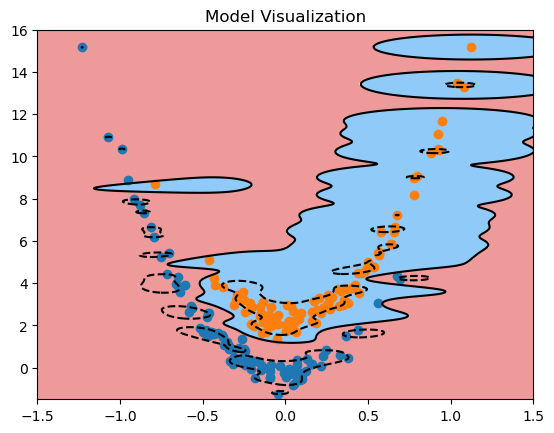

In [11]:
# x0_axis and x1_axis are the upper and lower limits that we tuned in advance to suit the data distribution. 
# It is used here only for better visualization.
x0_axis = [-1.5, 1.5]
x1_axis = [-1.5, 16]

x0,x1=np.meshgrid(
        np.linspace(x0_axis[0], x0_axis[1], int((x0_axis[1]-x0_axis[0])*100)),
        np.linspace(x1_axis[0], x1_axis[1], int((x1_axis[1]-x1_axis[0])*100))
    )

x_new=np.c_[x0.ravel(),x1.ravel()]
y_predict=clf.predict(x_new).reshape(x0.shape)

custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
plt.contourf(x0,x1,y_predict,linewidth=5,cmap=custom_cmap)

fx =clf.decision_function(x_new)
fx = fx.reshape(x0.shape)
plt.contour(x0, x1, fx, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.scatter(X[y==-1, 0], X[y==-1, 1], label='-1')
plt.scatter(X[y== 1, 0], X[y== 1, 1], label='1')

plt.title(f'Model Visualization')

### Visualizing Hyperparameter Space

In this part, you are asked to visualize the effect of the hyperparameter $C$ (regularization parameter) and $\gamma$ on the SVM model. Note that you not only need to conclude the most suitable values of C and $\gamma$ at the end of this part, but also need to figure out the main functions of $\gamma$ through visual observation.

Tips: 
- You only need to give a rough value and show your visual process. No need for very detailed parameter tuning.
- Parameter $\gamma$ may be named as $\sigma$ somewhere else. We use the letter $\gamma$ here to keep consistency with the usage in `sklearn.svm.SVC`. They are the same, the parameter of the Gaussian kernel function.


In [12]:
custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

x0_axis = [-1.5, 1.5]
x1_axis = [-1.5, 16]
x0, x1 = np.meshgrid(
    np.linspace(x0_axis[0], x0_axis[1], int((x0_axis[1] - x0_axis[0]) * 100)),
    np.linspace(x1_axis[0], x1_axis[1], int((x1_axis[1] - x1_axis[0]) * 100))
)

def plot_decision_boundary(model):
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new).reshape(x0.shape)

    fx = model.decision_function(x_new)
    fx = fx.reshape(x0.shape)
    ax.contour(x0, x1, fx, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

    ax.contourf(x0, x1, y_predict, cmap=custom_cmap)
    ax.scatter(X[y==-1, 0], X[y==-1, 1], label='-1')
    ax.scatter(X[y== 1, 0], X[y== 1, 1], label='1')
    ax.set_title(f'C={model.C}, gamma={model.gamma}')
    

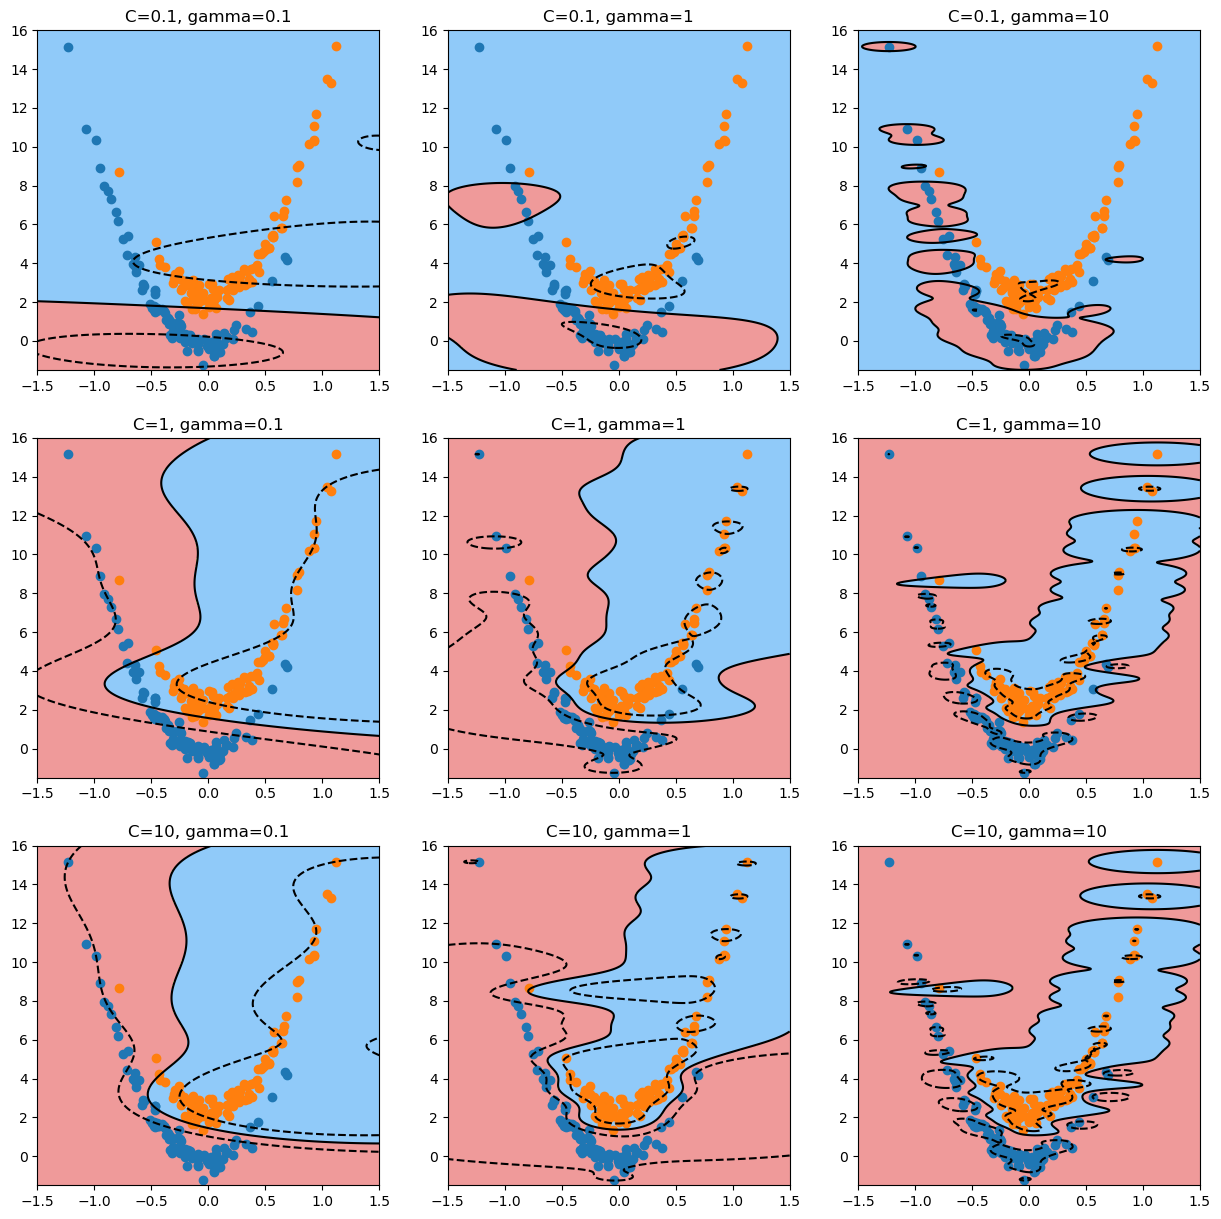

In [13]:
# Visualize the effect of hyperparameters C and gamma
# Requirements:
# - You should implement the SVM model with different C and gamma values
# - You should draw the decision boundary of each model using the provided function above
# - Candidate C and gamma values are provided

C_list = [0.1, 1, 10]
gamma_list = [0.1, 1, 10]
row_num, col_num = len(C_list), len(gamma_list)
fig, axes = plt.subplots(row_num, col_num, figsize=(15, 15))

for row in range(row_num):
    for col in range(col_num):
        ax = axes[row, col]
        ########## Start of Your Code ##########
        clf_rbf = svm.SVC(kernel='rbf', gamma=gamma_list[col], C=C_list[row], max_iter=1000)
        clf_rbf.fit(X, y)
        plot_decision_boundary(clf_rbf)
        ########## End of Your Code ##########
        

### Hyperparameter Tuning

In this part, you need to tune the hyperparameter $C$ (regularization parameter) and $\gamma$ of the SVM model using a grid search. Use 21 values for $C$ and $\gamma$ in $[2^{-10},2^{-9},\ldots,2^{9},2^{10}]$ on a log scale. Report accuracy under 5-fold cross validation and the optimal hyperparameter values. We recommend to use `sklearn`’s GridSearchCV defined above.


In [14]:
# Fit a grid search with 5-fold cross validation for SVM - RBF kernel. 
# Quite a detailed grid search. May take a while.
svc = svm.SVC(kernel='rbf')
resolution = 21
param_grid = {'C': np.logspace(-10, 10, resolution, base=2),
              'gamma': np.logspace(-10, 10, resolution, base=2)}
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X, y)
print('Finish!')

Finish!


In [15]:
scores = grid_search.cv_results_['mean_test_score'].reshape(resolution, resolution)
max_value = scores.max()
max_position = np.where(scores == max_value)
print("max value :", max_value)
print("C:", param_grid['C'][max_position[0][0]], ", gamma:", param_grid['gamma'][max_position[1][0]], " has top performance.")

max value : 0.97
C: 1024.0 , gamma: 0.0625  has top performance.


## Task 3 (Optional): DIY SVM 

If you have completed the previous tasks and feel confident with your understanding, you can take on an additional challenge. Implementing SVM manually, without relying on built-in library functions, will be the focus of this part. Completing this task will earn you extra points.
